In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final.csv')

# Display the first few rows to confirm structure
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Ball Number  over  ball  Ball       bowler bowler_role       batsman  \
0          0.1     0     1     1  Umesh Yadav     Bowlers  Rohit Sharma   
1          0.2     0     2     2  Umesh Yadav     Bowlers  Rohit Sharma   
2          0.3     0     3     3  Umesh Yadav     Bowlers   Aaron Finch   
3          0.4     0     4     4  Umesh Yadav     Bowlers  Rohit Sharma   
4          0.5     0     5     5  Umesh Yadav     Bowlers   Aaron Finch   

  batsman_role  Runs  is_wicket  ...  target  runs_needed overs_remaining  \
0      Batters     0      False  ...     169          169       19.833333   
1      Batters     1      False  ...     169          168       19.666667   
2      Batters     1      False  ...     169          167       19.500000   
3      Batters     1      False  ...     169          166       19.333333   
4      Batters     1      False  ...     169          165       19.166667   

  required_run_rate wickets_fallen  wickets_in_hand  Ground_Type  inn

In [8]:
# Count unique matches, bowlers, and batsmen
num_matches = df['match_id'].nunique()
num_bowlers = df['bowler'].nunique()
num_batsmen = df['batsman'].nunique()

print(f"Number of unique matches: {num_matches}")
print(f"Number of unique bowlers: {num_bowlers}")
print(f"Number of unique batsmen: {num_batsmen}")

# Distribution of Runs and wickets
print("\nRuns Distribution:")
print(df['Runs'].describe())
print("\nWicket Frequency:")
print(df['is_wicket'].value_counts(normalize=True))

Number of unique matches: 74
Number of unique bowlers: 339
Number of unique batsmen: 422

Runs Distribution:
count    143823.000000
mean          1.368363
std           1.659811
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: Runs, dtype: float64

Wicket Frequency:
is_wicket
False    0.950133
True     0.049867
Name: proportion, dtype: float64


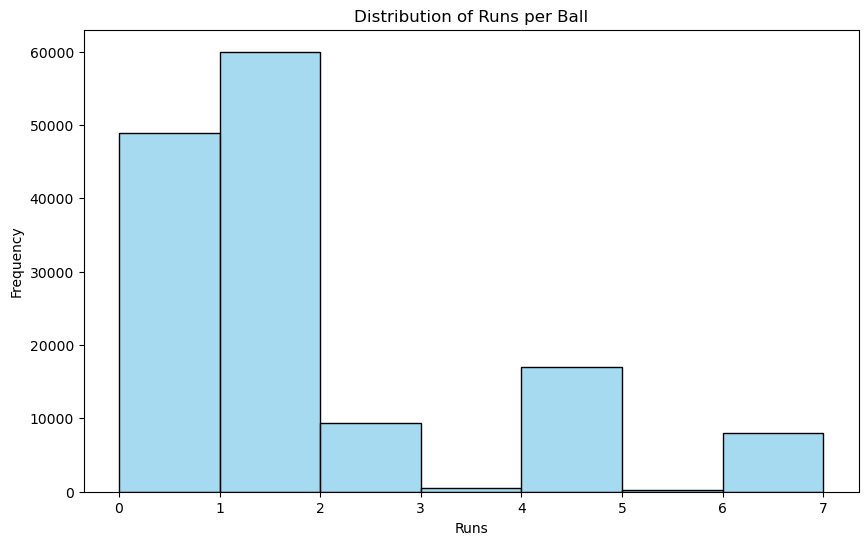

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Runs'], bins=range(0, 8), kde=False, color='skyblue')
plt.title('Distribution of Runs per Ball')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

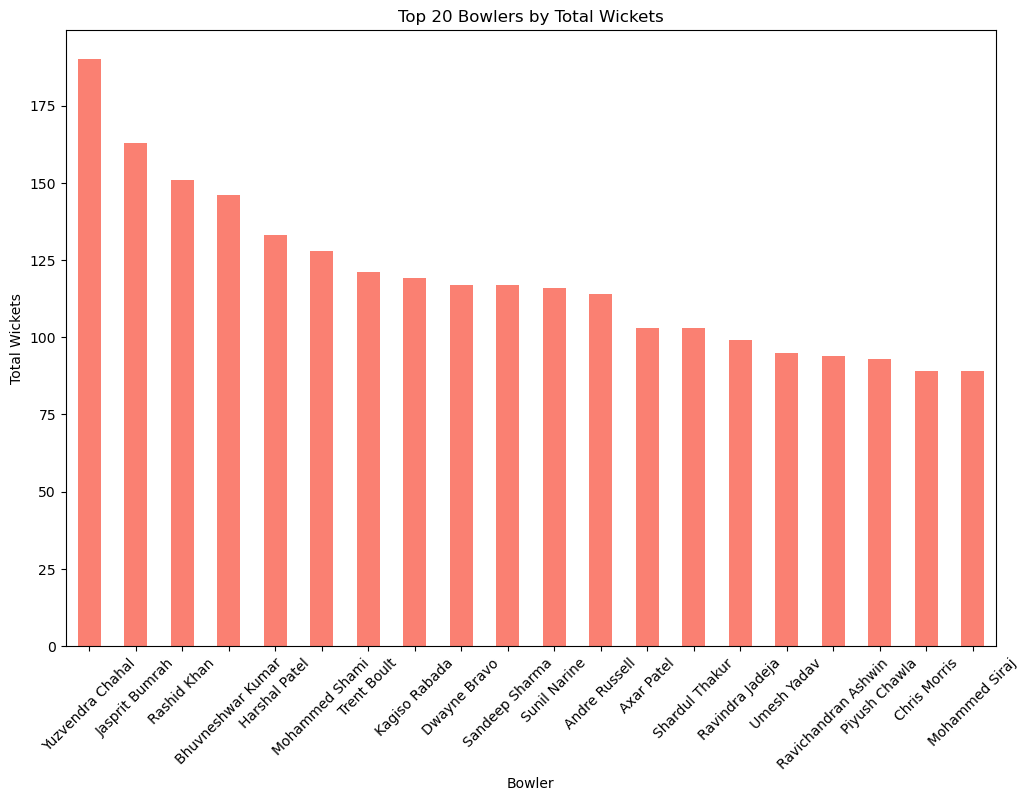

In [5]:
wickets_per_bowler = df.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False)
top_n = 20
plt.figure(figsize=(12, 8))
wickets_per_bowler.head(top_n).plot(kind='bar', color='salmon')
plt.title(f'Top {top_n} Bowlers by Total Wickets')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.show()

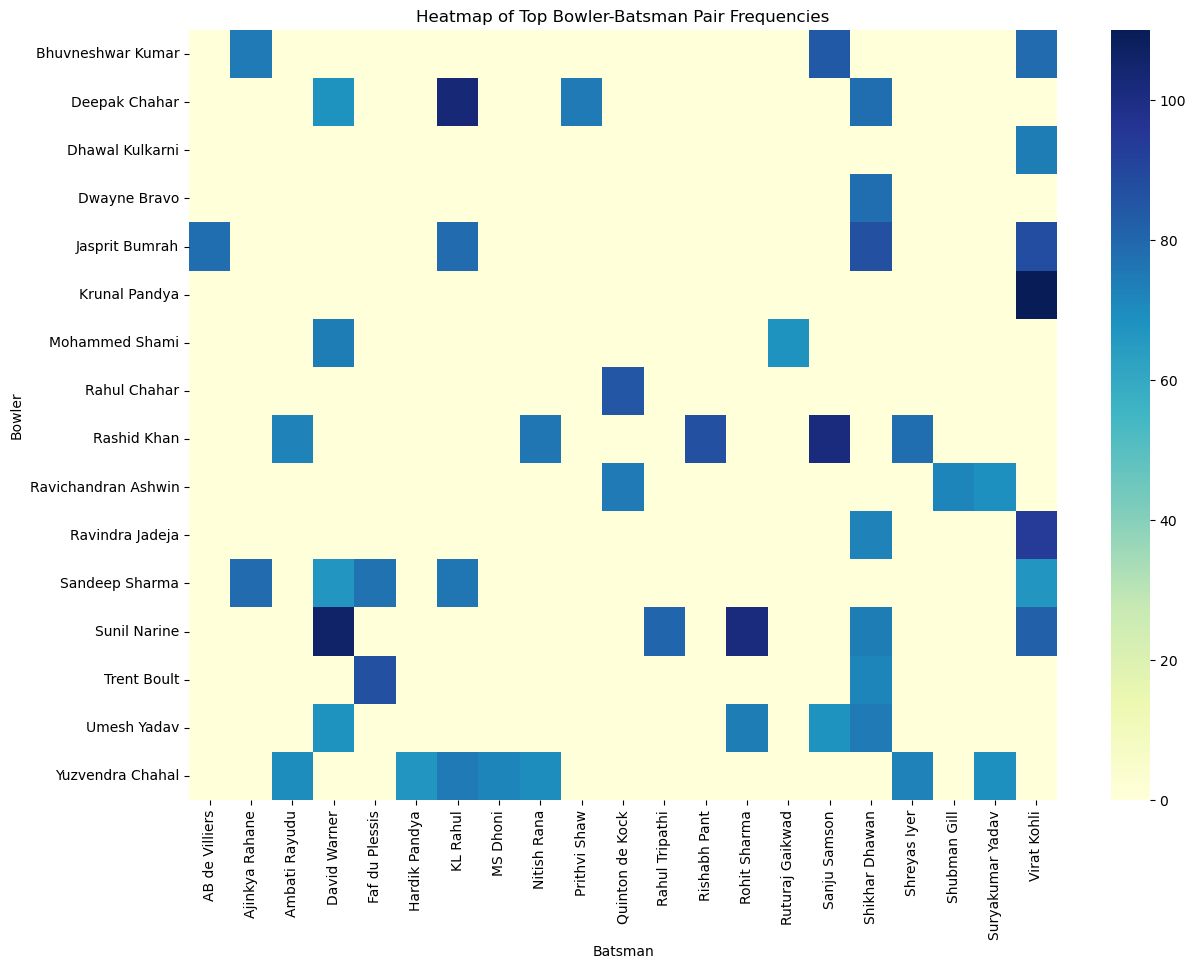

In [6]:
pair_freq = df.groupby(['bowler', 'batsman']).size().reset_index(name='balls_faced')
pair_freq = pair_freq.sort_values(by='balls_faced', ascending=False)
M = 50  # Top 50 pairs for readability
top_pairs = pair_freq.head(M)
pivot = top_pairs.pivot(index='bowler', columns='batsman', values='balls_faced').fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Top Bowler-Batsman Pair Frequencies')
plt.xlabel('Batsman')
plt.ylabel('Bowler')
plt.show()

In [7]:
print("\nMatches per Stadium:")
print(df['stadium'].value_counts().head(10))
print("\nMatches per City:")
print(df['city'].value_counts().head(10))
print("\nMatches per Ground_Type:")
print(df['Ground_Type'].value_counts())


Matches per Stadium:
stadium
Wankhede Stadium                           18872
Eden Gardens                               11841
Arun Jaitley Stadium                       11200
M Chinnaswamy Stadium                      10817
MA Chidambaram Stadium                      9814
Rajiv Gandhi International Stadium          9744
Dubai International Cricket Stadium         9146
Maharashtra Cricket Association Stadium     8175
Punjab Cricket Association Stadium          6807
Zayed Cricket Stadium                       6555
Name: count, dtype: int64

Matches per City:
city
Mumbai          28345
Kolkata         11841
Delhi           11200
Chepauk          9814
Uppal            9744
Dubai (DICS)     9146
Pune             8175
Abu Dhabi        7052
Bangalore        6915
Mohali           6807
Name: count, dtype: int64

Matches per Ground_Type:
Ground_Type
Medium    68101
Large     50409
Small     24818
Name: count, dtype: int64



Average Runs per Over by Stadium:
stadium
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium        162.043969
Holkar Cricket Stadium                                     160.762364
Maharaja Yadavindra Singh International Cricket Stadium    159.460729
Sawai Mansingh Stadium                                     158.753958
Zayed Cricket Stadium                                      156.759878
Sharjah Cricket Stadium                                    156.640168
Punjab Cricket Association Stadium                         155.172470
M Chinnaswamy Stadium                                      154.752427
Arun Jaitley Stadium                                       154.371964
Rajiv Gandhi International Stadium                         154.151273
Name: Runs_per_over, dtype: float64


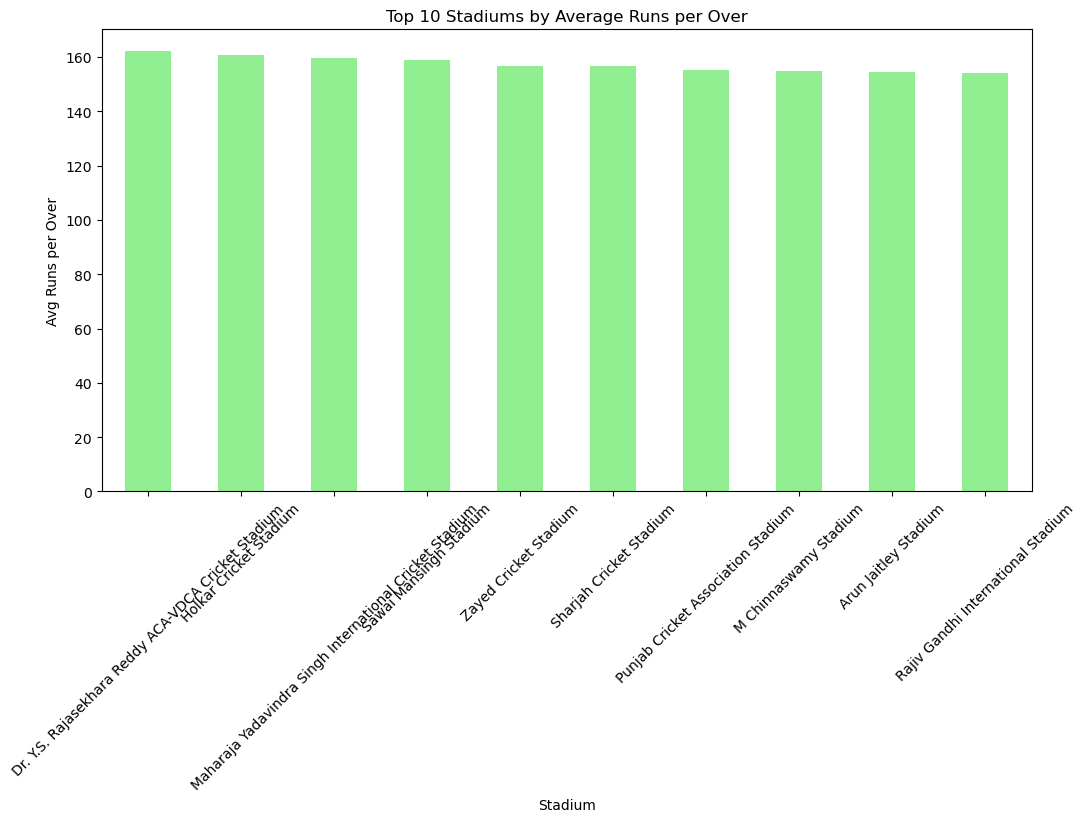

In [8]:
# Calculate runs per over
runs_per_over = df.groupby(['match_id', 'over'])['Runs'].sum().reset_index()
df_with_over = df.merge(runs_per_over, on=['match_id', 'over'], suffixes=('', '_per_over'))
avg_runs_per_stadium = df_with_over.groupby('stadium')['Runs_per_over'].mean().sort_values(ascending=False)

print("\nAverage Runs per Over by Stadium:")
print(avg_runs_per_stadium.head(10))

plt.figure(figsize=(12, 6))
avg_runs_per_stadium.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Stadiums by Average Runs per Over')
plt.xlabel('Stadium')
plt.ylabel('Avg Runs per Over')
plt.xticks(rotation=45)
plt.show()

In [9]:
pair_stats = df.groupby(['bowler', 'batsman']).agg({
    'ball': 'count',  # Total balls faced
    'Runs': 'sum',    # Total runs conceded
    'is_wicket': 'sum'  # Total wickets
}).rename(columns={'ball': 'balls_faced'}).reset_index()

print("\nTop 10 Bowler-Batsman Pairs by Balls Faced:")
print(pair_stats.sort_values(by='balls_faced', ascending=False).head(10))


Top 10 Bowler-Batsman Pairs by Balls Faced:
                bowler         batsman  balls_faced  Runs  is_wicket
6859     Krunal Pandya     Virat Kohli          110   120          1
13694     Sunil Narine    David Warner          106   186          1
3279     Deepak Chahar        KL Rahul          103   162          0
13779     Sunil Narine    Rohit Sharma          101   117          5
11346      Rashid Khan    Sanju Samson          101   118          2
11873  Ravindra Jadeja     Virat Kohli           94   108          3
5492    Jasprit Bumrah     Virat Kohli           88   134          4
11337      Rashid Khan    Rishabh Pant           87   103          3
14346      Trent Boult  Faf du Plessis           87    92          4
5468    Jasprit Bumrah  Shikhar Dhawan           87   111          1


In [10]:
total_pairs = pair_stats.shape[0]
sparse_pairs = pair_stats[pair_stats['balls_faced'] < 20].shape[0]
sparsity_percentage = (sparse_pairs / total_pairs) * 100

print(f"\nTotal bowler-batsman pairs: {total_pairs}")
print(f"Pairs with fewer than 20 balls: {sparse_pairs}")
print(f"Sparsity percentage (<20 balls): {sparsity_percentage:.2f}%")


Total bowler-batsman pairs: 15991
Pairs with fewer than 20 balls: 14300
Sparsity percentage (<20 balls): 89.43%



Bowler Role Performance:
              avg_runs_per_ball  avg_wickets_per_ball
bowler_role                                          
All-Rounders           1.342709              0.046388
Bowlers                1.384868              0.051986


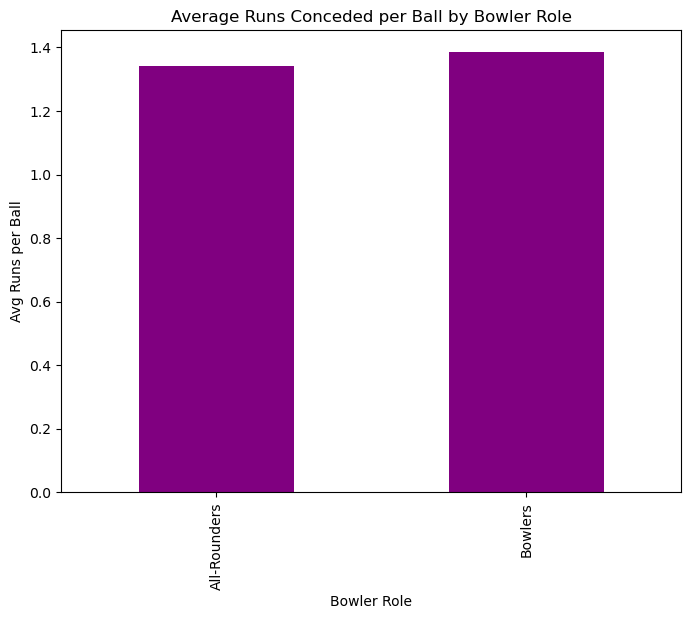

In [11]:
bowler_role_stats = df.groupby('bowler_role').agg({
    'Runs': 'mean',
    'is_wicket': 'mean'
}).rename(columns={'Runs': 'avg_runs_per_ball', 'is_wicket': 'avg_wickets_per_ball'})

print("\nBowler Role Performance:")
print(bowler_role_stats)

plt.figure(figsize=(8, 6))
bowler_role_stats['avg_runs_per_ball'].plot(kind='bar', color='purple')
plt.title('Average Runs Conceded per Ball by Bowler Role')
plt.xlabel('Bowler Role')
plt.ylabel('Avg Runs per Ball')
plt.show()


Batsman Role Performance:
              avg_runs_per_ball
batsman_role                   
All-Rounders           1.405066
Batters                1.377295
Bowlers                1.099955


<Figure size 800x600 with 0 Axes>

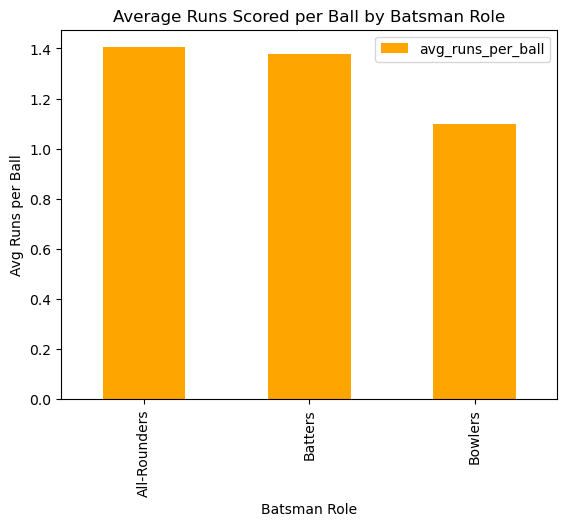

In [12]:
batsman_role_stats = df.groupby('batsman_role').agg({
    'Runs': 'mean'
}).rename(columns={'Runs': 'avg_runs_per_ball'})

print("\nBatsman Role Performance:")
print(batsman_role_stats)

plt.figure(figsize=(8, 6))
batsman_role_stats.plot(kind='bar', color='orange')
plt.title('Average Runs Scored per Ball by Batsman Role')
plt.xlabel('Batsman Role')
plt.ylabel('Avg Runs per Ball')
plt.show()


Performance by Game Phase:
           avg_runs_per_ball  avg_wickets_per_ball
phase                                             
Death               1.597431              0.079934
Middle              1.292157              0.042574
Powerplay           1.311282              0.038401


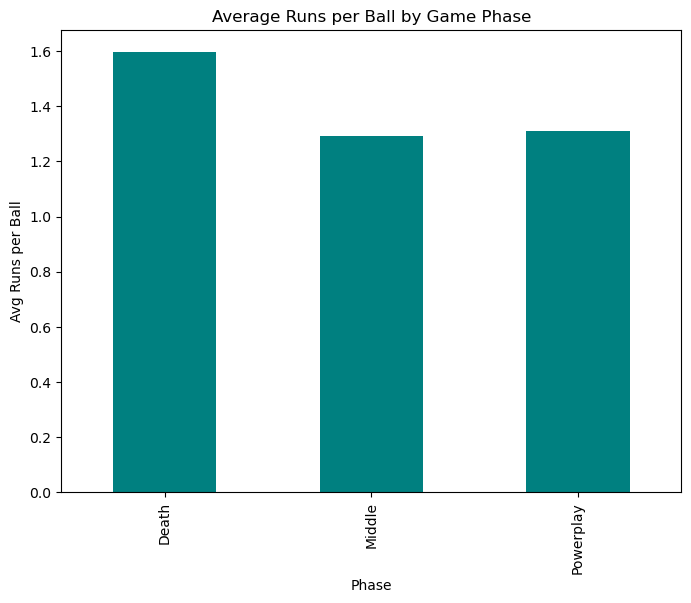

In [13]:
def get_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 15:
        return 'Middle'
    else:
        return 'Death'

df['phase'] = df['over'].apply(get_phase)
phase_stats = df.groupby('phase').agg({
    'Runs': 'mean',
    'is_wicket': 'mean'
}).rename(columns={'Runs': 'avg_runs_per_ball', 'is_wicket': 'avg_wickets_per_ball'})

print("\nPerformance by Game Phase:")
print(phase_stats)

plt.figure(figsize=(8, 6))
phase_stats['avg_runs_per_ball'].plot(kind='bar', color='teal')
plt.title('Average Runs per Ball by Game Phase')
plt.xlabel('Phase')
plt.ylabel('Avg Runs per Ball')
plt.show()

In [14]:
# Bowler consistency
bowler_over_stats = df.groupby(['bowler', 'match_id', 'over'])['Runs'].sum().reset_index()
bowler_variance = bowler_over_stats.groupby('bowler')['Runs'].var().sort_values(ascending=False)

print("\nTop 10 Most Inconsistent Bowlers (Variance in Runs per Over):")
print(bowler_variance.head(10))

# Batsman consistency
batsman_match_stats = df.groupby(['batsman', 'match_id'])['Runs'].sum().reset_index()
batsman_variance = batsman_match_stats.groupby('batsman')['Runs'].var().sort_values(ascending=False)

print("\nTop 10 Most Inconsistent Batsmen (Variance in Runs per Match):")
print(batsman_variance.head(10))


Top 10 Most Inconsistent Bowlers (Variance in Runs per Over):
bowler
Gurnoor Brar         124.000000
Lukman Meriwala       60.333333
Abdul Samad           59.527778
Odean Smith           58.066667
Reece Topley          53.743590
Luke Wood             52.666667
Shamar Joseph         51.583333
Mandeep Singh         50.000000
Bhuvneshwar Kumar     49.811531
Glenn Phillips        49.000000
Name: Runs, dtype: float64

Top 10 Most Inconsistent Batsmen (Variance in Runs per Match):
batsman
Sanju Samson       5081.182350
Shikhar Dhawan     3990.690476
Virat Kohli        3560.872819
David Warner       3497.461538
Quinton de Kock    3415.806122
KL Rahul           3177.713725
Rohit Sharma       2977.357532
Ruturaj Gaikwad    2835.588394
Rishabh Pant       2755.126939
AB de Villiers     2590.073725
Name: Runs, dtype: float64


                       Runs  is_wicket  current_run_rate    target  \
Runs               1.000000  -0.188868          0.236962  0.095480   
is_wicket         -0.188868   1.000000         -0.006384 -0.010079   
current_run_rate   0.236962  -0.006384          1.000000  0.359692   
target             0.095480  -0.010079          0.359692  1.000000   
required_run_rate  0.013001   0.030096          0.021289  0.296096   
overs_remaining   -0.073563  -0.074061         -0.171961 -0.047333   
wickets_fallen    -0.016912   0.162925         -0.040647 -0.053945   

                   required_run_rate  overs_remaining  wickets_fallen  
Runs                        0.013001        -0.073563       -0.016912  
is_wicket                   0.030096        -0.074061        0.162925  
current_run_rate            0.021289        -0.171961       -0.040647  
target                      0.296096        -0.047333       -0.053945  
required_run_rate           1.000000        -0.242477        0.289581  
overs_r

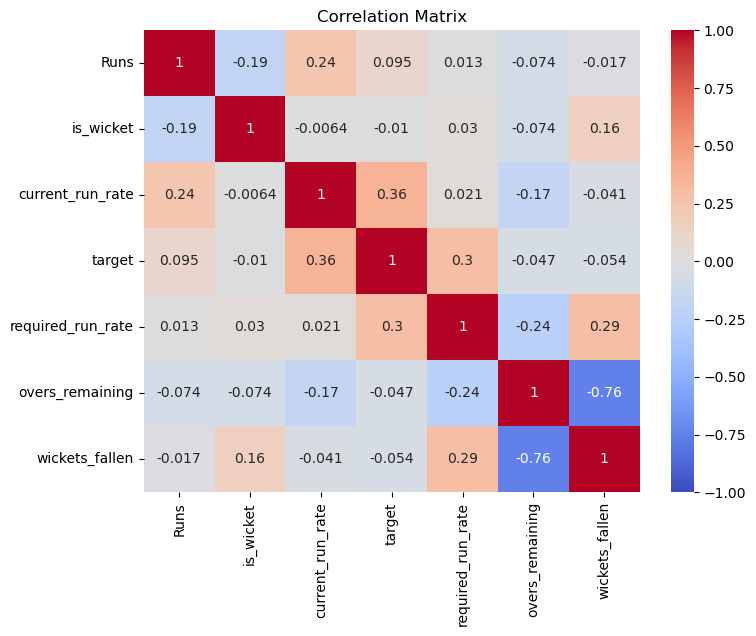

In [15]:
correlation_matrix = df[['Runs', 'is_wicket','current_run_rate', 'target',
                        'required_run_rate', 'overs_remaining', 'wickets_fallen']].corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

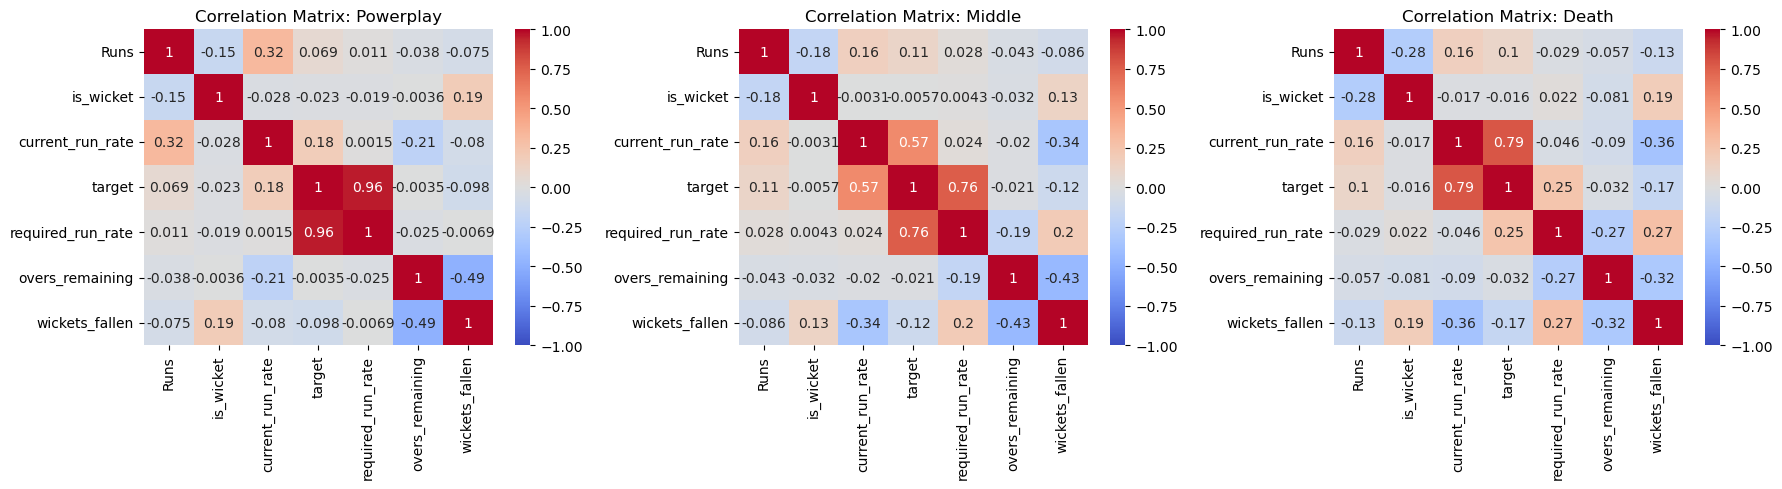

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Step 1: Define the phase column based on 'over' ---
def get_phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

# Create the 'phase' column
df['phase'] = df['over'].apply(get_phase)

# --- Step 2: Define relevant columns ---
features = ['Runs', 'is_wicket', 'current_run_rate', 'target',
            'required_run_rate', 'overs_remaining', 'wickets_fallen']

# --- Step 3: Plot correlation matrix per phase ---
phases = ['Powerplay', 'Middle', 'Death']

plt.figure(figsize=(18, 5))

for i, phase in enumerate(phases, 1):
    plt.subplot(1, 3, i)
    phase_df = df[df['phase'] == phase]
    corr_matrix = phase_df[features].corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix: {phase}')

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

def analyze_bowler_batsman_pairs(data_file='final.csv'):
    try:
        df = pd.read_csv(data_file)
        pair_stats = df.groupby(['bowler', 'batsman']).agg({
            'ball': 'count'  # Total balls faced/bowled
        }).rename(columns={'ball': 'balls_faced'}).reset_index()
        
        # Count total unique pairs
        total_pairs = len(pair_stats)
        
        # Analyze pairs by balls faced
        less_than_10 = len(pair_stats[pair_stats['balls_faced'] < 10])
        between_10_50 = len(pair_stats[(pair_stats['balls_faced'] >= 10) & (pair_stats['balls_faced'] <= 50)])
        more_than_50 = len(pair_stats[pair_stats['balls_faced'] > 50])
        
        # Print results
        print(f"\nTotal number of unique bowler-batsman pairs: {total_pairs}")
        print("\nBreakdown by balls faced:")
        print(f"  Pairs with less than 10 balls: {less_than_10}")
        print(f"  Pairs with 10 to 50 balls (inclusive): {between_10_50}")
        print(f"  Pairs with more than 50 balls: {more_than_50}")
        
        return pair_stats
    except KeyError as e:
        print(f"Error: Column {e} not found in the dataset. Please check column names.")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None

if __name__ == "__main__":
    # Example usage
    pair_stats = analyze_bowler_batsman_pairs(data_file='final.csv')


Total number of unique bowler-batsman pairs: 15991

Breakdown by balls faced:
  Pairs with less than 10 balls: 11227
  Pairs with 10 to 50 balls (inclusive): 4605
  Pairs with more than 50 balls: 159
